In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_excel('docs/Canada.xlsx',
                      skiprows=range(20),
                       skipfooter=2,
                       sheet_name='Canada by Citizenship')
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.columns = list(map(str,df_can.columns.values))

In [5]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.set_index('Country',inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_can['total']=df_can.iloc[:,3:].sum(axis=1)
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [8]:
years=list(map(str,range(1980,2014)))

In [9]:
df_india = df_can.loc['India',years]

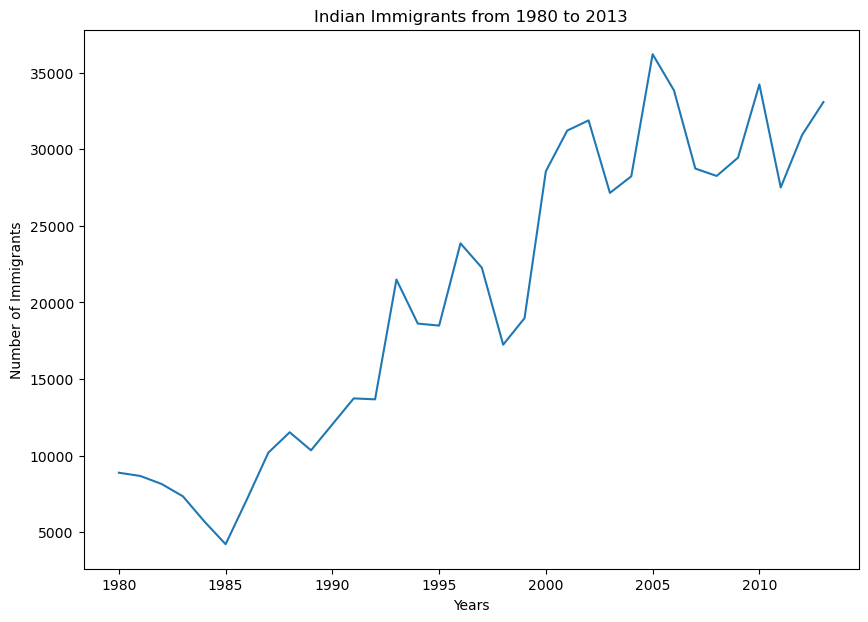

In [10]:
df_india.plot(kind='line',figsize=(10,7))
plt.title('Indian Immigrants from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

In [11]:
df_ci = df_can.loc[['India','China'],years]
df_ci = df_ci.transpose()

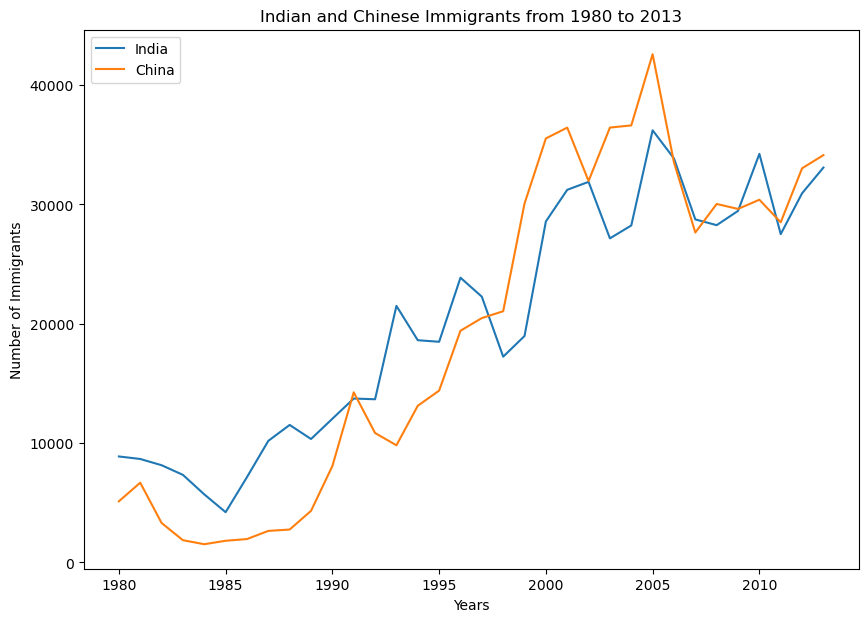

In [12]:
df_ci.plot(kind='line',figsize=(10,7))
plt.title('Indian and Chinese Immigrants from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.legend(loc='upper left')
plt.show()

In [13]:
df_can.sort_values(by='total',ascending=False,axis=0,inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [14]:
df_top5=df_can.head()

In [15]:

df_top5 = df_top5.loc[:,'1980':'2013'].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.index.name='Years'
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
Years,,,,,
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334


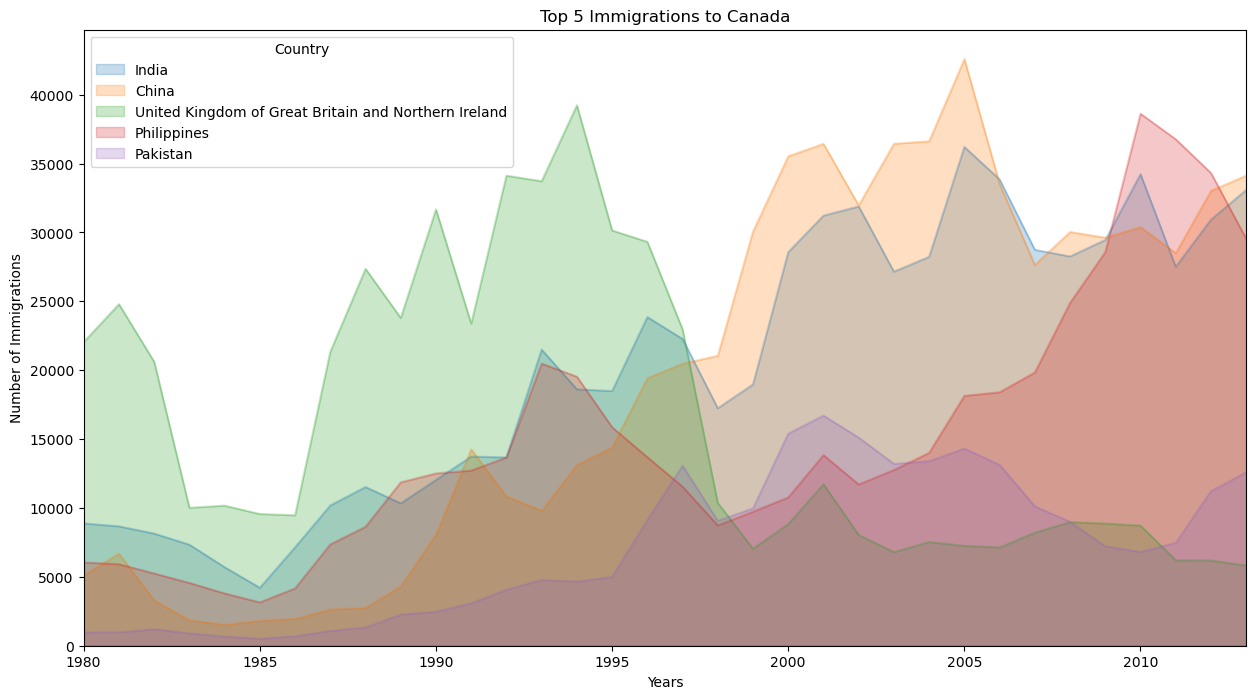

In [16]:
df_top5.plot(kind='area',
             figsize=(15,8),
            xlim=(1980,2013),
            alpha=0.25,
            stacked=False)
plt.title('Top 5 Immigrations to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrations')
plt.show()

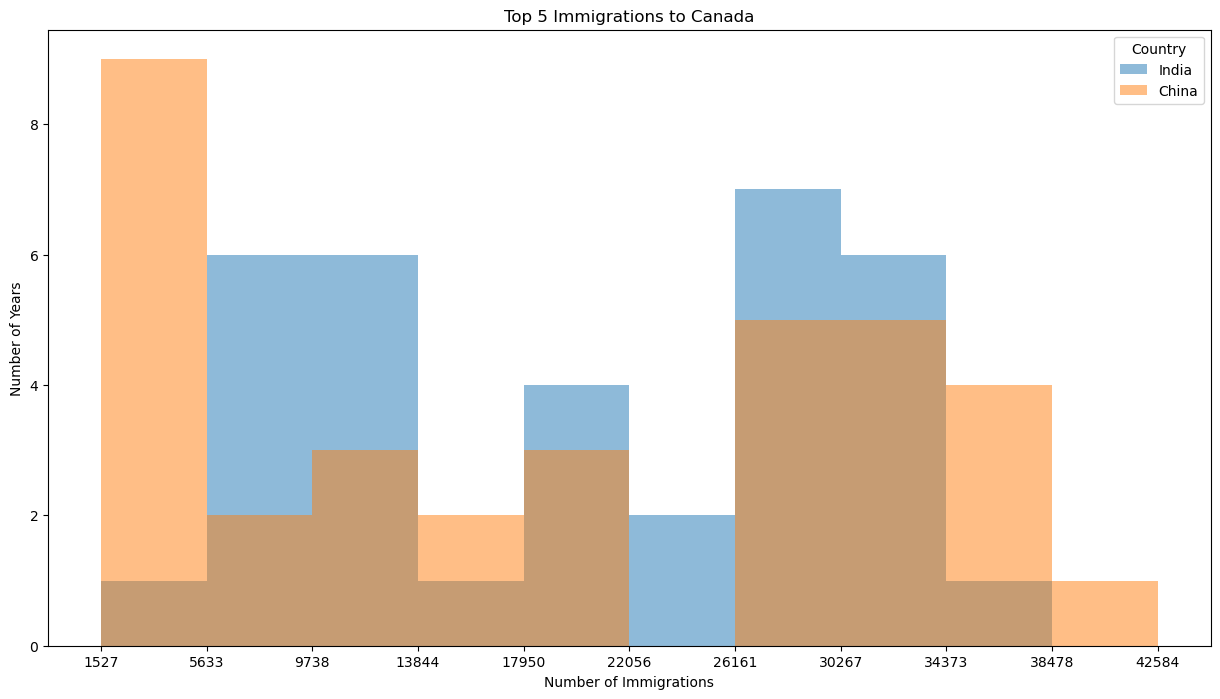

In [17]:
df_top3 = df_can[years].head(2).transpose()
count,bin_edges = np.histogram(df_top3)
df_top3.plot(kind='hist',
             figsize=(15,8),
             xticks = bin_edges,
             alpha=0.5,
            stacked=False)
plt.title('Top 5 Immigrations to Canada')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrations')
plt.show()

In [18]:
df_iceland = df_can.loc['Iceland',years]

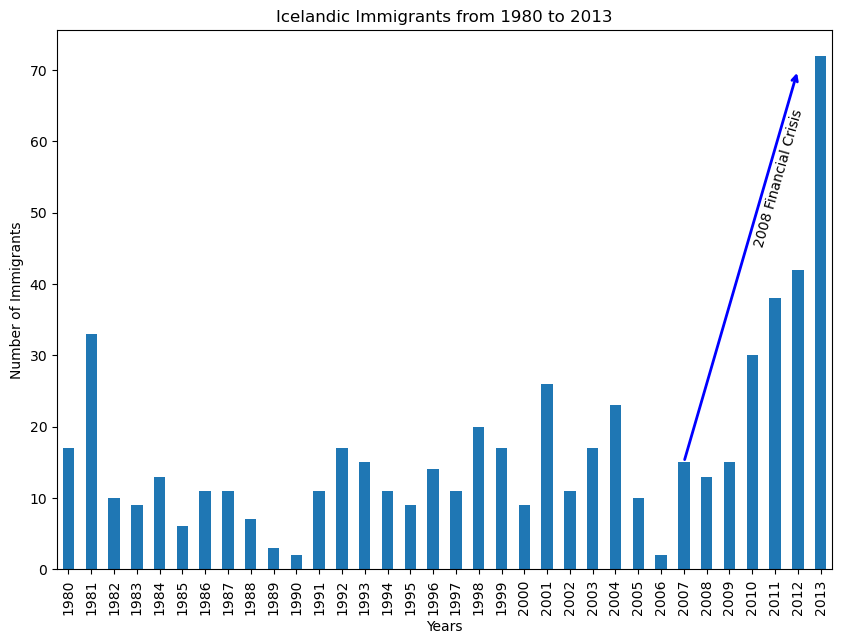

In [19]:
df_iceland.plot(kind='bar',
             figsize=(10,7),
             )
plt.title('Icelandic Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.annotate('',
            xy=(32,70),
            xytext=(27,15),
            arrowprops=dict(arrowstyle='->',lw=2,color='b'))
plt.annotate('2008 Financial Crisis',
            xy=(30,45),
             rotation=74,
            va='bottom',
            ha='left')
plt.show()

In [20]:
df_cont = df_can.reset_index()[['Continent','total']]
df_cont = df_cont.groupby('Continent').sum()
df_cont

,total
Continent,
Africa,618948
Asia,3317794
Europe,1410947
Latin America and the Caribbean,765148
Northern America,241142
Oceania,55174


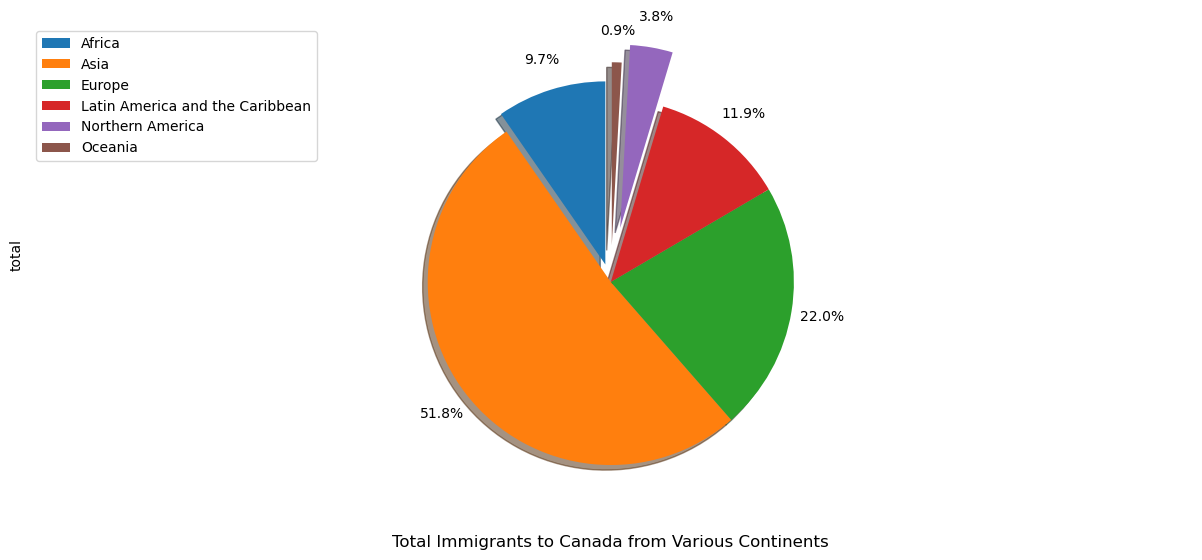

In [21]:
explode_list=[0.1,0,0,0,0.3,0.2]
df_cont['total'].plot(kind='pie',
                     startangle=90,
                     figsize=(15,6),
                      autopct='%0.1f%%',
                      pctdistance = 1.17,
                      shadow=True,
                     labels=None,
                     explode=explode_list)
plt.legend(df_cont.index.values,loc='upper left')
plt.title('Total Immigrants to Canada from Various Continents',y=-0.15)
plt.axis('equal')
plt.show()

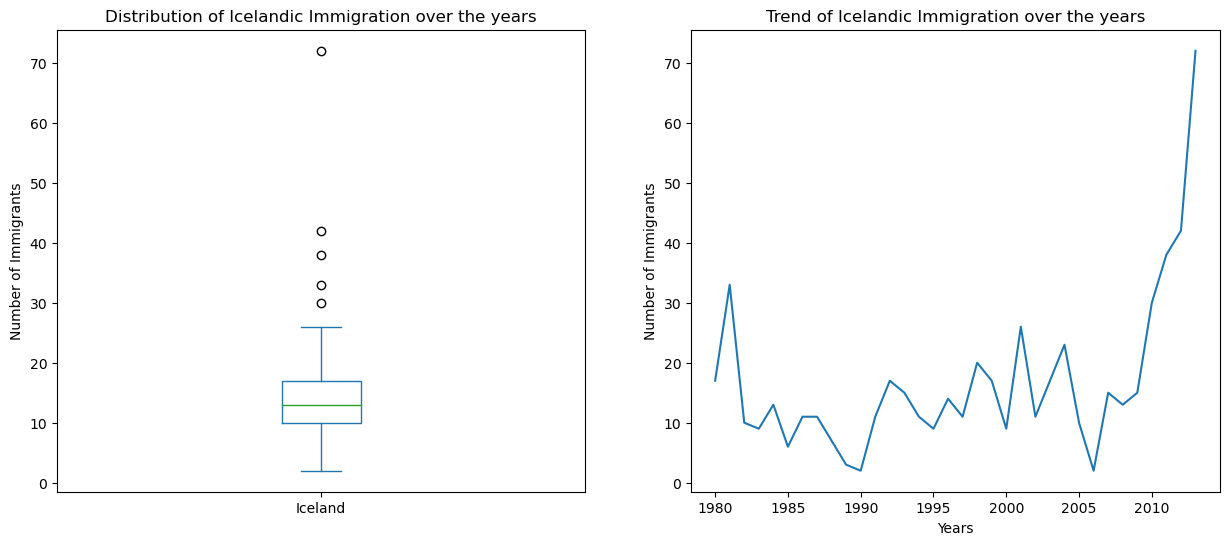

In [22]:
fig = plt.figure(figsize=(15,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_iceland.plot(kind='box',ax=ax0)
ax0.set_title('Distribution of Icelandic Immigration over the years')
ax0.set_ylabel('Number of Immigrants')

df_iceland.plot(kind='line',ax=ax1)
ax1.set_title('Trend of Icelandic Immigration over the years')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigrants')
plt.show()

In [23]:
df_iceland = pd.DataFrame(df_iceland).reset_index()

In [24]:
df_iceland.columns=['years','immigrations']

In [25]:
df_iceland['immigrations'] = df_iceland['immigrations'].astype(int)

In [26]:
df_iceland.describe()

,immigrations
count,34.000000
mean,16.764706
std,13.558088
min,2.000000
25%,10.000000
50%,13.000000
75%,17.000000
max,72.000000


In [27]:
Q1 = 10
Q3 = 16
IQR = Q3 - Q1
Q3 + (1.5*IQR)

25.0

In [28]:
df_iceland[df_iceland['immigrations']>25]

,years,immigrations
1,1981,33
21,2001,26
30,2010,30
31,2011,38
32,2012,42
33,2013,72


In [40]:
norm_india = (df_ci['India'] - df_ci['India'].min())/(df_ci['India'].max()-df_ci['India'].min())
norm_china = (df_ci['China'] - df_ci['China'].min())/(df_ci['China'].max()-df_ci['China'].min())

In [30]:
df_ci.reset_index(inplace=True)

Country,index,India,China
0,1980,8880,5123
1,1981,8670,6682
2,1982,8147,3308
3,1983,7338,1863
4,1984,5704,1527
5,1985,4211,1816
6,1986,7150,1960
7,1987,10189,2643
8,1988,11522,2758
9,1989,10343,4323


In [38]:
df_ci.columns.name=None
df_ci.columns = ['years','India','China']

In [39]:
df_ci = df_ci.astype(int)
df_ci.describe()

,years,India,China
count,34.000000,34.000000,34.000000
mean,1996.500000,20350.117647,19410.647059
std,9.958246,10007.342579,13568.230790
min,1980.000000,4211.000000,1527.000000
25%,1988.250000,10637.750000,5512.750000
50%,1996.500000,20235.000000,19945.000000
75%,2004.750000,28699.500000,31568.500000
max,2013.000000,36210.000000,42584.000000


In [44]:
df_ci.index

RangeIndex(start=0, stop=34, step=1, name='')

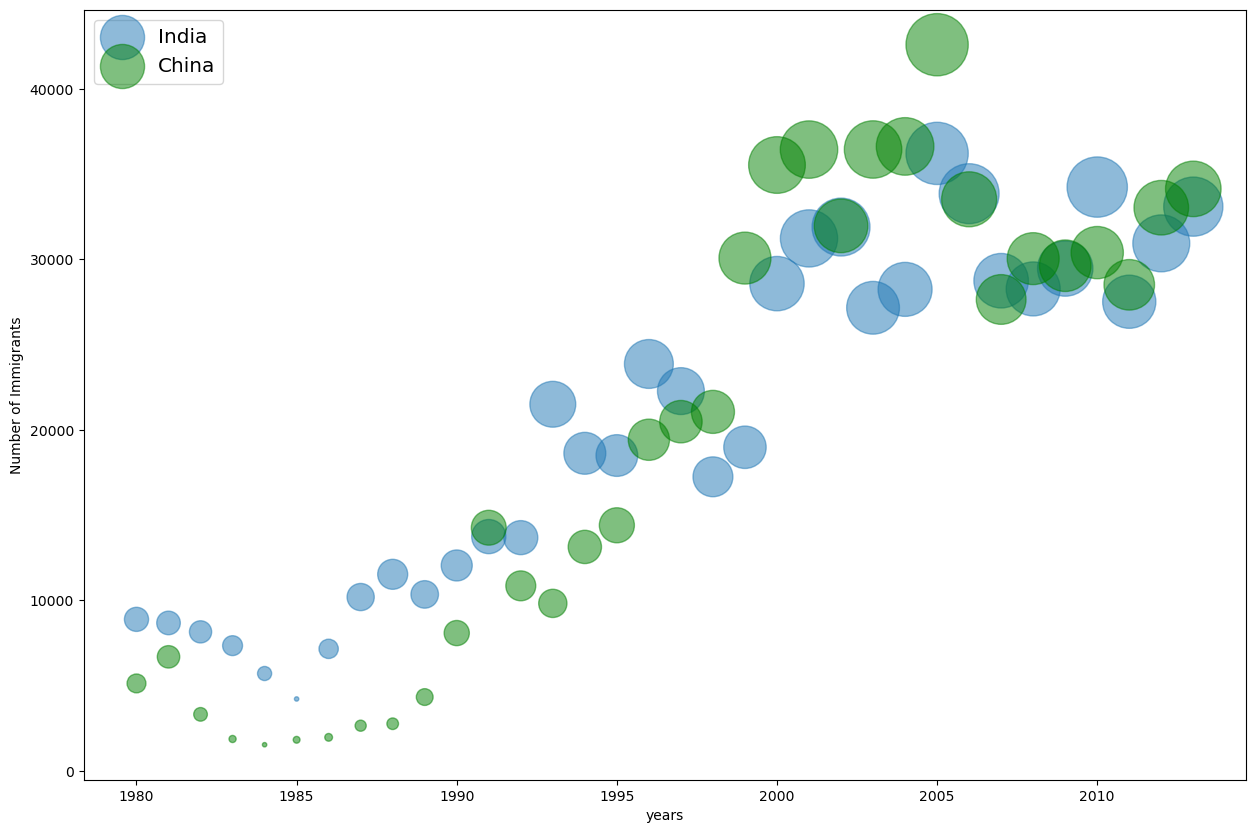

In [62]:
ax0=df_ci.plot(kind='scatter',
           x='years',
           y='India',
               figsize=(15,10),
             s=norm_india*2000+10,
              alpha=0.5)
df_ci.plot(kind='scatter',
           x='years',
           y='China',
               figsize=(15,10),
             s=norm_china*2000+10,
          ax=ax0,
          color='green',
          alpha=0.5)

ax0.set_ylabel('Number of Immigrants')
plt.legend(['India','China'],loc='upper left',fontsize='x-large')
plt.show()